In [140]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


In [141]:
def f(x):
    """ function to approximate by polynomial interpolation"""
    return x * np.sin(x)

In [142]:
x_plot = np.linspace(0, 10, 100)

# generate points and keep a subset of them
x = np.linspace(0, 10, 100)
rng = np.random.RandomState(0)
rng.shuffle(x)
x = np.sort(x[:20])
y = f(x)

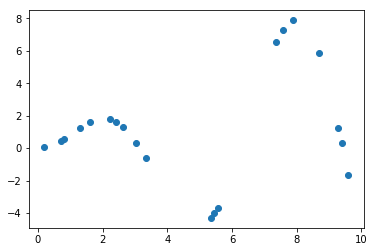

In [143]:
#plt.plot(x_plot, f(x_plot), color='cornflowerblue', linewidth=2, label="ground truth")
plt.scatter(x,f(x))

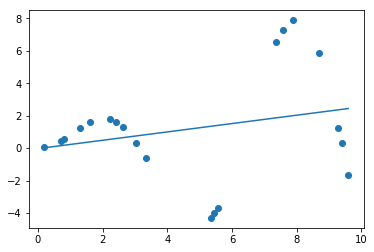

In [144]:
X = x[:, np.newaxis]
model = LinearRegression()
model.fit(X,f(x))
plt.scatter(x,f(x))
plt.plot(x, [model.predict(x_i) for x_i in x])

In [145]:
poly = PolynomialFeatures(degree=5)
X_ = poly.fit_transform(X)

In [146]:
clf = LinearRegression()
clf.fit(X_, [f(x_i) for x_i in x ])


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

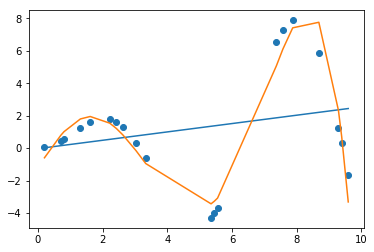

In [147]:
X = x[:, np.newaxis]
model = LinearRegression()
model.fit(X,f(x))
plt.scatter(x,f(x))
plt.plot(x, [model.predict(x_i) for x_i in x])
plt.plot(x, clf.predict(X_))

In [148]:
def plot_poly_regression(degree, X, y):
    X_ = X[:, np.newaxis]
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_, y)
    y_plot = model.predict(X_)
    plt.scatter(X, y)
    plt.plot(X, y_plot, linewidth=2, label="degree %d" % degree)

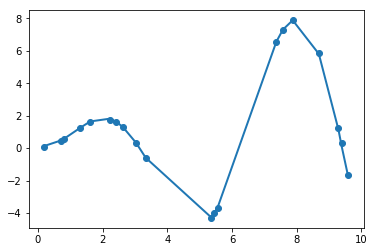

In [149]:
x = np.linspace(0, 10, 100)
rng = np.random.RandomState(0)
rng.shuffle(x)
x = np.sort(x[:20])
y = f(x)

plot_poly_regression(16,x,y)

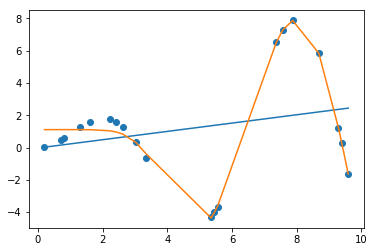

In [150]:
from sklearn.linear_model import Lasso

x_plot = np.linspace(0, 10, 100)
rng = np.random.RandomState(0)
rng.shuffle(x)
x = np.sort(x[:30])
y = f(x)
plt.scatter(x,y)

lm = LinearRegression()
X_ = x[:,np.newaxis]
lm.fit(X_,y)
plt.plot(x,lm.predict(X_))

poly = PolynomialFeatures(degree=20)
X_poly = poly.fit_transform(X_)
lm.fit(X_poly,y)
plt.plot(x,lm.predict(X_poly))




/home/thiagodepaulo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.137920e-31
  overwrite_a=True).T
/home/thiagodepaulo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.558565e-29
  overwrite_a=True).T
/home/thiagodepaulo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.166310e-30
  overwrite_a=True).T
/home/thiagodepaulo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal

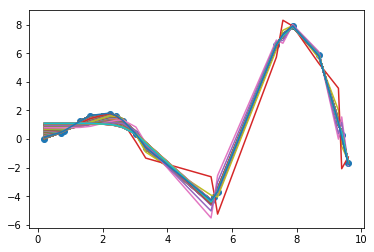

In [171]:
poly = PolynomialFeatures(degree=16)
X_poly = poly.fit_transform(X)

plt.scatter(x,y)

alphas = np.logspace(-6, 6, 200)

for alpha in alphas:
    ri = Ridge(alpha=alpha)
    ri.fit(X_poly,y)
    plt.plot(x,ri.predict(X_poly))


lm.fit(X_poly, y)
plt.plot(x,lm.predict(X_poly))

/home/thiagodepaulo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


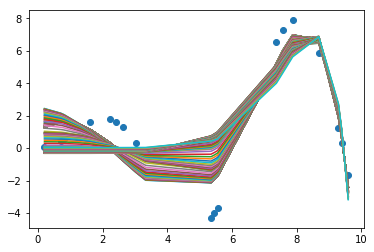

In [169]:
poly = PolynomialFeatures(degree=16)
X_poly = poly.fit_transform(X)

plt.scatter(x,y)
alphas = np.logspace(-6, 6, 200)

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_poly,y)
    plt.plot(x,lasso.predict(X_poly))